# K Means clustering

- Randomly initialize k points called means or cluster centroids.
- Categorize each item to its closest mean and update the mean's coordinates.
- Mean or centroids will be the averages of the items categorized in that cluster so far.
- Repeat the process for a given no of iterations and form the clusters. 

- means are the mean values of the items in the data set.
- means can be initialized at random items in the data set or at random values between boundaries of the data set.
- for selecting right number of clusters `Elbow method` can be used which is a graphical tool.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

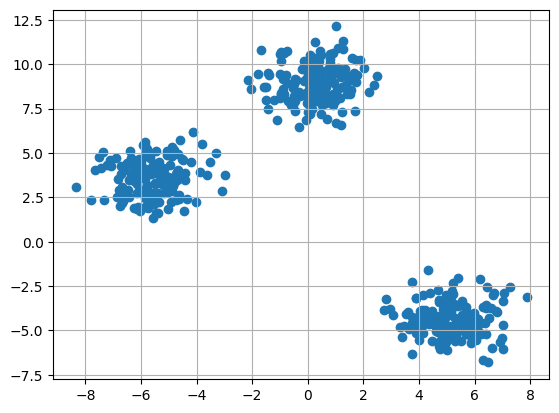

In [2]:
# create custom datasets and plot it
X,y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
# initialize random centroids
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
  center = 2*(2*np.random.random((X.shape[1],))-1)
  cluster = {
    'center': center,
    'points': []
  }
  clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

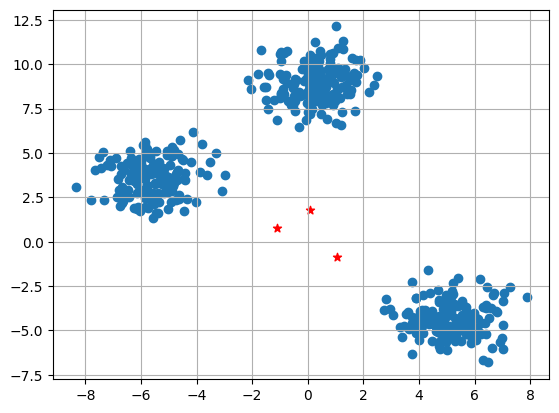

In [6]:
# plotting random centroids/means with data points
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0],center[1],marker='*',c='red')
plt.show()

In [13]:
# define euclidean distance for mean
def distance(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))

In [11]:
# assign data points to the nearest cluster center
def assign_clusters(X,clusters):
  for idx in range(X.shape[0]):
    dist = []
    curr_x = X[idx]
    for i in range(k):
      dis = distance(curr_x,clusters[i]['center'])
      dist.append(dis)
    curr_cluster = np.argmin(dist)
    clusters[curr_cluster]['points'].append(curr_x)
  return clusters

# update cluster center based on the mean of assigned points
def update_clusters(X, clusters):
  for i in range(k):
    points = np.array(clusters[i]['points'])
    if points.shape[0] > 0:
      new_center = points.mean(axis=0)
      clusters[i]['center'] = new_center

      clusters[i]['points'] = []
  return clusters

In [15]:
# predict function
def predict_cluster(X,clusters):
  pred = []
  for i in range(X.shape[0]):
    dist = []
    for j in range(k):
      dist.append(distance(X[i],clusters[j]['center']))
    pred.append(np.argmin(dist))
  return pred

In [16]:
# assign update and predict cluster center
clusters = assign_clusters(X, clusters)
clusters = update_clusters(X, clusters)
pred = predict_cluster(X, clusters)

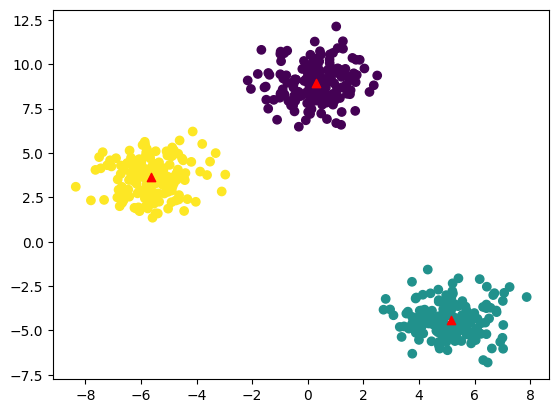

In [17]:
# plotting data points with their predicted cluster center
plt.scatter(X[:,0],X[:,1], c=pred)
for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0],center[1],marker='^',c='red')
plt.show()